<a href="https://colab.research.google.com/github/Jennapa-colab/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [103]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [104]:
Name = 'เจนนภา พุนานิล'
ID = '620205153'

In [105]:
def DataGenerator(name , id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [106]:
Data = DataGenerator(Name,ID)

205:26:11


In [107]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.746081,1.963649,-3.176159,-6.402508,-7.359925,4.730829,5.799691,-6.149527,7.347787,0.023327,-4.965278,-0.004448,8.948408,9.677902,6.208102,-0.463013,5.781165,-0.794780,-2.692595,5.232439,3.777623,5.294714,-6.155839,7.682633,-2.159569,0.450328,5.927297,2.251642
1,-4.807520,3.760107,-5.621673,9.387034,7.098877,-7.837570,-5.120543,-1.691722,9.725839,10.768628,0.672162,5.976725,-1.741181,-3.056779,7.790765,-2.222485,-7.677237,5.695793,-4.916433,8.563735,-9.088730,3.367314,0.758942,-2.398818,-0.260307,6.044223,9.520215,30.221117
2,5.593417,-4.931845,-8.901668,-7.038077,9.885714,3.533791,6.471191,-5.604961,-9.256491,1.070084,-1.175886,9.047849,7.756356,4.308344,-1.331975,-0.623895,5.628885,0.972647,-4.020952,4.208513,9.227652,9.120627,-3.041579,4.442665,10.270662,2.319351,-7.863690,11.596756
3,2.719730,-2.958296,7.403377,-7.562966,4.354402,6.672606,5.438045,1.112302,-8.184561,-8.173706,-7.698810,2.058201,3.327009,-10.397335,-0.371899,-8.825595,3.291795,4.297427,-4.077083,-0.571625,3.014798,9.271884,9.882933,-0.983544,-7.272469,7.801703,-3.916593,39.008513
4,-8.595029,7.107728,1.542347,-3.011885,-9.271411,1.021657,9.781685,-5.654519,8.917947,8.823196,-1.250732,8.700323,-9.317812,0.825720,2.474870,8.082394,2.857187,-7.718466,5.080408,-6.808975,5.000012,-9.687336,1.580805,-4.616937,-4.824128,6.648780,16.215457,33.243901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.416864,5.567816,-6.360796,1.673636,3.862207,-6.409543,-9.457410,-6.302617,8.918462,1.541444,0.294547,-6.152960,7.622955,-5.109692,7.026165,-6.354529,3.843526,7.801566,2.079603,-5.183824,-6.572174,2.441687,-7.288748,-3.054824,-3.772848,-7.222291,13.135633,-36.111456
9996,2.186832,-5.586467,8.024322,-7.995908,3.438596,7.660373,6.623906,4.097856,-9.483874,-7.463528,-8.390956,2.324239,4.174721,-9.877421,-0.828186,-8.099301,3.301888,4.199326,-4.612607,-0.023282,2.460059,8.898448,7.971302,-0.830947,-8.309971,8.500479,-9.172934,42.502396
9997,-5.381866,5.906657,2.799436,-9.719801,-8.263723,-1.467805,-2.142341,1.607989,-6.840705,-1.658529,1.134903,-4.226189,-2.039111,8.990565,2.321984,-9.156661,-8.921819,0.872673,8.124689,4.477137,-6.214742,-2.701106,7.174459,0.368499,0.075974,-7.220183,13.813313,-36.100917
9998,-4.497349,6.695842,2.452071,-3.451667,-9.798585,-0.595841,9.201871,-4.383545,7.723183,10.101979,-1.636417,7.612986,-5.801983,-0.876524,1.688253,10.428903,2.618210,-8.520074,4.707777,-9.585377,2.757491,-8.226398,1.557084,-4.931987,-5.360272,5.391540,15.391683,26.957699


In [108]:
Data.shape 
#มีทั้งหมด 28 dimension
#ดูขนาดของข้อมูล Data ก่อน

(10000, 28)

##2.Clustering data แล้วต่อด้วยการทำ Visualize เพื่อให้ข้อมูลออกมา ในรปแบบที่เป็น 2 มิติ

##Import

##Import funcion ที่ใช้ในการทำ K-mean 

##DATA มากจาก sklearn.cluster

In [109]:
from sklearn.cluster import KMeans
#ทำการ import function ที่ต้องการใช้ในการทำ K-mean จาก sklearn.cluster

##Defind
**เพื่อกำหนดค่า K

In [110]:
Kmeans = KMeans(n_clusters  = 3, random_state = 2021 )
#random_state=2021 เริ่มสุ่มที่จุดเดียวกัน จะได้มีกลุ่มเหมือนกัน

In [111]:
Kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

##จุดที่คำนวณได้

In [112]:
Kmeans.cluster_centers_
#จุด Centroid มี 3 กลุ่ม เพราะ k=3

array([[-1.62015776e+00,  2.93529339e+00,  2.07121094e+00,
        -1.52064696e-01,  2.01731715e+00, -9.68489454e-01,
        -2.15942801e+00,  5.26754570e-01,  4.07091441e-01,
         3.15318731e-02, -2.27420084e+00, -1.95466660e+00,
         6.57635271e-01,  3.31036515e+00,  3.71624517e+00,
        -4.02717113e+00,  9.74515053e-02,  5.35591715e+00,
        -1.00170938e+00, -3.32173269e-02, -2.20651924e+00,
         9.03429329e-01,  2.60951536e-01,  1.64295290e+00,
         1.25927408e-01, -3.61145327e+00,  7.87058678e+00,
        -1.80572663e+01],
       [ 5.21067085e+00, -3.75798240e+00, -2.16094639e+00,
        -2.99666134e+00,  5.21444576e+00,  6.02867023e+00,
         2.81488752e+00,  1.58828790e+00, -8.37134138e+00,
        -4.81273824e+00, -5.72638209e+00,  5.98803157e+00,
         6.86160622e+00, -8.03543385e-01,  2.55517799e-01,
        -1.34211795e+00,  5.57396202e+00,  4.05224057e-01,
        -1.46752378e+00,  2.16379357e+00,  6.37801845e+00,
         5.57624495e+00,  3.43

##การจัดกลุ่มของ DATA

In [113]:
y = Kmeans.predict(Data)
y
#เนื่องจากมี data ที่มากเกินไป จึงจะทำ PCA ข้อมูลเพื่อลด dimensions 
#กำหนดให้ข้อมูลที่ทำการจัดกลุ่มเป็น y 

array([0, 2, 1, ..., 0, 2, 2], dtype=int32)

##PCA เพื่อลด DIMENTION

##ทำ PCA ข้อมูล Data แล้ว วาดกราฟ scatter plot โดยใส่สีตามผลการทำ kmeans clustering แล้วนำมาเทียบกับ กราฟ PCA - scatter ของข้อมูลจริง

In [115]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  

new_pca = pca.fit_transform(Data) 
#ทำ PCA ข้อมูล Data ใส่สีตามผลการทำ kmeans clustering 

In [116]:
new_pca

array([[  1.09308328,  -1.58599123],
       [-22.10860691,  21.23673002],
       [-13.94661022, -22.53597766],
       ...,
       [ 43.5931879 ,   2.59581914],
       [-22.60486342,  27.72079257],
       [-35.93040225,  23.6008884 ]])

In [117]:
matplotlib.rcParams['figure.figsize']=[5,5] #ทำการเพิ่มขนาดของกราฟ เพื่อให้ดูการกระจายของข้อมูลได้ง่ายขึ้นและดูข้อมุลที่ซ้อนทับกันได้ง่ายขึ้น

In [118]:
from matplotlib import pyplot as plt

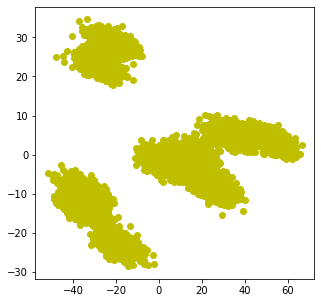

In [119]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')   
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy')  
#จะทำ PCA กี่รอบก็ได้เท่าเดิม เนื่องจาก  data ดูในมุมมองที่มีการกระจายข้อมูลดีที่สุด

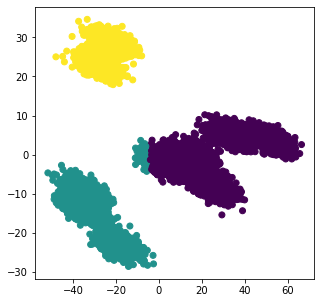

In [120]:
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

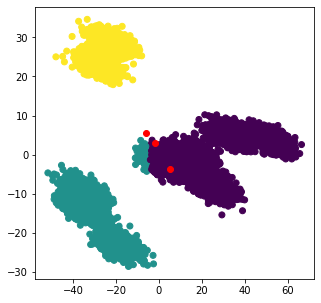

In [121]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y) # cluster center
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'or')

#SSE (Sum of Squared Errors)



In [122]:
kmeans.inertia_
#ทำการหาค่า Sum of Squared Errors

8130119.824511663

In [123]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)
#ทำการวนรูปข้อมูลเพื่อจะเปลี่ยน k จาก 1 ให้เป็นค่าดังต่อไปนี้ คือ 2,3,4,5,6,7และ 8

In [124]:
SSE
#เมื่อทำการรันข้อมูลแล้วจะมีข้อมูลออกมาทั้งหมด 8 ตัวด้วยกัน

[16607826.092277102,
 10024787.189454779,
 8130119.824511663,
 6671451.476620875,
 5434692.0346080605,
 4422697.092483179,
 3465739.297022264,
 2605789.1966648363]

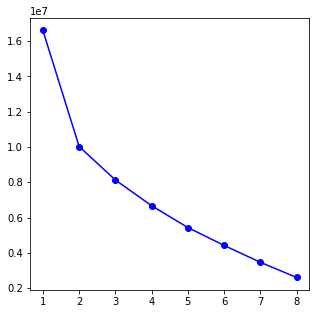

In [125]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')  
#เอาค่า SSE ที่คำนวณได้ มา เพื่อที่จะได้ทำการ plot graph ของข้อมูล

*เนื่องจากข้อมูลที่ได้ทำการ plot graph แล้วมจีงสรุปได้ว่า Elbow method หรือ SSE (Sum of Squared Errors) หรือ ศอก มี 2 ศอก เพราะ จุดไปตกที่เลขสอง และถือเป็นศอกของข้อมูล*

##silhouette coefficient
**Silhouette เป็นเทคนิคที่ใช้วัดว่า Instance นั้นมีความเหมือนกับ Cluster ที่มันอยู่มากเพียงใด เมื่อเทียบกับ Cluster อื่นๆ ค่าของ Silhouette อยู่ในช่วง -1 ถึง 1 ยิ่งมีค่ามากแสดงว่า Instance มีความคล้ายกับ cluster ของมันมากและมีความคล้ายกับ Cluster อื่นน้อย
Silhouette สามารถใช้ Distance metric อย่างเช่น Euclidean, Manhattan distance มาช่วยเพื่อวัดระยะ**



In [126]:
from sklearn import metrics

In [127]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)
#การทำ Silhouette Scores ต้องคิดข้อมูลหลายๆกลุ่ม จะคิดแค่กลุ่มเดียวไม่ได้

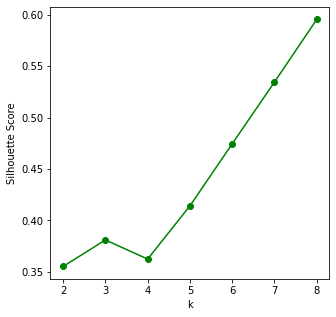

In [128]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('Silhouette Score');
#ถ้าดูจากจุดกราฟของ Silhouette Scores ที่สูงที่สุด 
#ถ้ามีค่ามากแสดงว่าใกล้กันมาก และจะมีค่าตั้งแต่-1ถึง 1

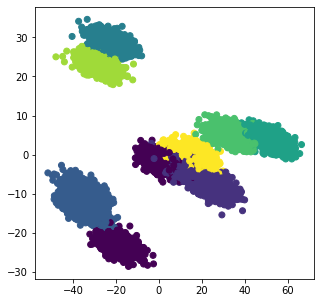

In [129]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

##3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

In [131]:
from sklearn.manifold import MDS

In [132]:
mds = MDS(n_components=2)
#กำหนดว่าเราจะใช้ components ของ mds เป็น 2

In [133]:
New_mds = mds.fit_transform(Data)
#คำนวณระยะห่างระหว่างจุด

##K-mean

In [134]:
kmeans2= KMeans(n_clusters=8,random_state=2021)  
#ให้ k= 8 ตามที่หาไว้
kmeans2.fit(Data)
g = kmeans2.predict(Data)
#กำหนดให้ข้อมูลที่ทำการจัดกลุ่มเป็น g

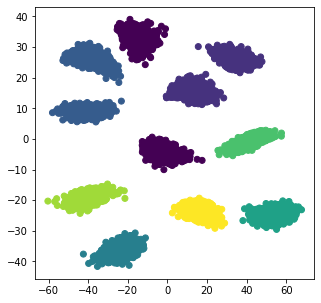

In [135]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(New_mds[:,0],New_mds[:,1],c=y)

##4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.

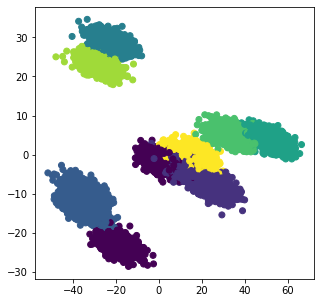

In [136]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

##กราฟของข้อ 3 ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ



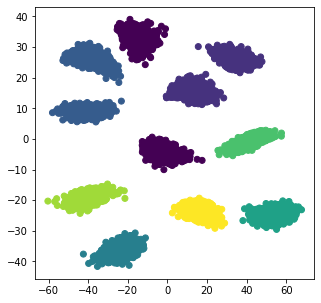

In [137]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(New_mds[:,0],New_mds[:,1],c=y)

จากการเปรียบเทียบการทำ clustering และ visualize ข้อมูลแบบ 2 มิติ ข้อ 2 กับ ข้อ3 แล้ว ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering และ visualize ข้อมูลแบบ 2 มิติ จะลด dimension ก่อน แล้วค่อยทำ clustering จะเห็นว่ากราฟข้อ 3 มีการกระจายข้อมูลที่เปลี่ยนไป และลักษณะการกระจายข้อมูลเล็กลง เนื่องจาก มี dimension ลดลง และ ระยะห่างยังคงเดิม แต่ ข้อ 2 การกระจายของข้อมูลมีขนาดใหญ่ เนื่องจาก ไม่มีการลด dimension 